In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

pathNameDef = "C:/Users/schof/LeedsUni/personalproject/Defect_images/"
pathNameMask = "C:/Users/schof/LeedsUni/personalproject/Mask_images/"
pathCropped = "C:/Users/schof/LeedsUni/personalproject/CroppedDefects/"
pathCroppedMask = "C:/Users/schof/LeedsUni/personalproject/CroppedMasks/"
pathDefectTile = "C:/Users/schof/LeedsUni/personalproject/DefectTiles/"
pathGoodTile = "C:/Users/schof/LeedsUni/personalproject/GoodTiles/"

pathNameNoDefect = "C:/Users/schof/LeedsUni/personalproject/NODefect_images/"
pathNameNoDefectCropped = "C:/Users/schof/LeedsUni/personalproject/NODefect_images_cropped/"


suff = "_mask"

['0001_002_00.png', '0002_002_00.png', '0003_002_00.png', '0004_002_01.png', '0005_002_01.png', '0006_002_01.png', '0010_006_02.png', '0011_006_02.png', '0012_006_02.png', '0013_006_02.png', '0014_006_02.png', '0015_006_02.png', '0016_006_02.png', '0017_002_02.png', '0018_010_03.png', '0019_016_03.png', '0020_016_03.png', '0021_016_03.png', '0022_019_02.png', '0023_019_02.png', '0024_019_02.png', '0025_019_02.png', '0026_019_02.png', '0027_019_02.png', '0028_019_02.png', '0029_019_02.png', '0030_019_02.png', '0031_019_02.png', '0032_019_02.png', '0033_019_02.png', '0034_019_02.png', '0035_019_02.png', '0036_019_02.png', '0037_019_02.png', '0038_019_02.png', '0039_019_02.png', '0040_019_02.png', '0041_019_02.png', '0042_019_02.png', '0043_019_04.png', '0044_019_04.png', '0045_019_04.png', '0046_019_04.png', '0047_019_04.png', '0048_019_04.png', '0049_030_03.png', '0050_019_03.png', '0051_019_03.png', '0052_019_03.png', '0053_019_03.png', '0054_019_03.png', '0055_019_06.png', '0056_019_0

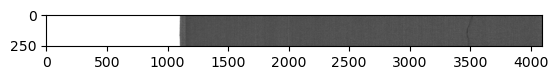

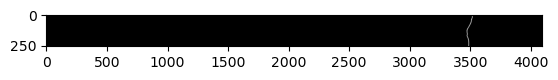

In [7]:

arr = os.listdir(pathNameDef)
print(arr)

defect = cv2.imread(pathNameDef+arr[0])
mask = cv2.imread(pathNameMask+arr[0][:-4]+suff+".png")
plt.imshow(defect)
plt.show()
plt.imshow(mask)
plt.show()

In [5]:
def findEdge(img):


    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.blur(img_gray, (3,3)) 

    ret, thresh1 = cv2.threshold(img_blur, 254, 255, cv2.THRESH_BINARY_INV)


    edges = cv2.Canny(image=thresh1, threshold1=100, threshold2=200) # Canny Edge Detection
    
    inner = 0
    y = 0
    for row in edges:
        x = 0
        for pix in row:
            if pix != 0:
                if x > inner and x < 0.4*img.shape[1]:
                    inner = x
            x = x+1
        y=y+1
        
    return inner, edges
    
def cropImage(img):
    inner, canny = findEdge(img)
    height = img.shape[0]
    width = img.shape[1]

    if(inner > 0):
        cropped = img[0:height, inner + 80:width]
    else:
        cropped = img[0:height, 0:width]
    return cropped, canny

In [63]:
arr = os.listdir(pathNameDef)


for name in arr:
    defect = cv2.imread(pathNameDef+name)
    mask = cv2.imread(pathNameMask+name[:-4]+suff+".png")
    height = mask.shape[0]
    width = mask.shape[1]

    cropped, canny = cropImage(defect)
    c_width = cropped.shape[1]

    croppedMask = mask[0:height, width-c_width:width]

    #print(pathNameDef+name)
    #print(pathNameMask+name[:-4]+suff+".png")
    
    
    cv2.imwrite(pathCropped+name, cropped)
    cv2.imwrite(pathCroppedMask+name[:-4]+suff+".png", croppedMask)

print("done")
#     plt.imshow(cropped)
#     plt.show()
#     plt.imshow(croppedMask)
#     plt.show()
#     plt.imshow(canny)
#     plt.show()

C:/Users/schof/LeedsUni/personalproject/Defect_images/0001_002_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0001_002_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0002_002_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0002_002_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0003_002_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0003_002_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0004_002_01.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0004_002_01_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0005_002_01.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0005_002_01_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0006_002_01.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0006_002_01_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0010_006_02.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0010_006_02_mask.png

C:/Users/schof/LeedsUni/personalproject/Defect_images/0062_022_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0062_022_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0063_022_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0063_022_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0064_022_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0064_022_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0065_022_00.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0065_022_00_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0066_023_01.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0066_023_01_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0067_023_01.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0067_023_01_mask.png
C:/Users/schof/LeedsUni/personalproject/Defect_images/0068_023_02.png
C:/Users/schof/LeedsUni/personalproject/Mask_images/0068_023_02_mask.png

Image 44 and 97 have two masks that need to be joined

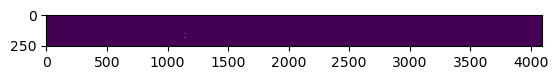

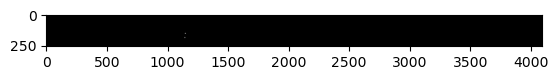

[[183, 1146, 216], [183, 1147, 208], [184, 1146, 242], [184, 1147, 197], [185, 1145, 192], [185, 1146, 239], [185, 1147, 204], [186, 1145, 224], [186, 1146, 242], [186, 1147, 240], [186, 1148, 220], [187, 1144, 247], [187, 1145, 229], [187, 1146, 234], [187, 1147, 247], [187, 1148, 247], [187, 1149, 239], [188, 1144, 235], [188, 1145, 226], [188, 1146, 247], [188, 1147, 235], [188, 1148, 244], [188, 1149, 244], [188, 1150, 221], [189, 1144, 235], [189, 1145, 228], [189, 1146, 247], [189, 1147, 222], [189, 1148, 227], [189, 1149, 227], [189, 1150, 212], [190, 1144, 233], [190, 1145, 235], [190, 1146, 241], [190, 1147, 241], [190, 1148, 223], [191, 1145, 218], [191, 1146, 227], [191, 1147, 239], [191, 1148, 218]]


In [59]:
# need to join both 44 and 97 have two masks that need to be joined

M44_1 = "C:/Users/schof/LeedsUni/personalproject/Mask_images/0044_019_04_mask1.png"
M44_2 = "C:/Users/schof/LeedsUni/personalproject/Mask_images/0044_019_04_mask2.png"


m1 = cv2.imread(M44_1)
Mask1 = cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY)

m2 = cv2.imread(M44_2)
Mask2 = cv2.cvtColor(m2, cv2.COLOR_BGR2GRAY)

MaskBoth = np.copy(Mask1)

mask1Indecies = []

y= 0
for row in Mask2:
    x = 0
    for pix in row:
        if pix != 0:
            mask1Indecies.append([y,x,pix])
        x = x+1
    y=y+1
    
for pix in mask1Indecies:
    MaskBoth[pix[0]][pix[1]] = pix[2]
        
    
plt.imshow(MaskBoth)
plt.show()

M44Both = cv2.cvtColor(MaskBoth,cv2.COLOR_GRAY2RGB)

cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/Mask_images/0044_019_04_mask.png", M44Both)

plt.imshow(backtorgb)
plt.show()
print(mask1Indecies)

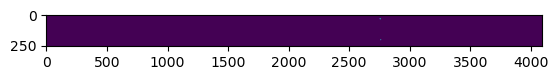

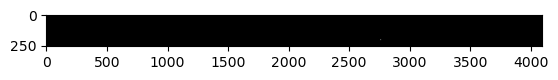

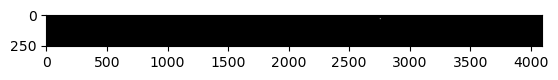

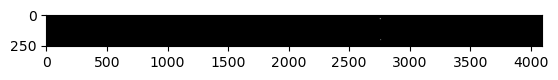

[[34, 2759, 230], [34, 2760, 243], [34, 2761, 245], [34, 2762, 243], [34, 2763, 233], [34, 2764, 72], [35, 2756, 172], [35, 2757, 240], [35, 2758, 243], [35, 2759, 246], [35, 2760, 247], [35, 2761, 246], [35, 2762, 246], [35, 2763, 246], [35, 2764, 215], [36, 2756, 239], [36, 2757, 246], [36, 2758, 246], [36, 2759, 246], [36, 2760, 245], [36, 2761, 246], [36, 2762, 246], [36, 2763, 245], [36, 2764, 218], [37, 2756, 246], [37, 2757, 246], [37, 2758, 245], [37, 2759, 245], [37, 2760, 245], [37, 2761, 244], [37, 2762, 246], [37, 2763, 236], [38, 2756, 245], [38, 2757, 246], [38, 2758, 246], [38, 2759, 246], [38, 2760, 246], [38, 2761, 245], [38, 2762, 245], [38, 2763, 236], [39, 2756, 229], [39, 2757, 245], [39, 2758, 246], [39, 2759, 246], [39, 2760, 246], [39, 2761, 246], [39, 2762, 246], [39, 2763, 149], [40, 2759, 208], [40, 2760, 243], [40, 2761, 245], [40, 2762, 242], [40, 2763, 93]]


In [58]:
# need to join both 44 and 97 have two masks that need to be joined

M44_1 = "C:/Users/schof/LeedsUni/personalproject/Mask_images/0097_030_03_mask1.png"
M44_2 = "C:/Users/schof/LeedsUni/personalproject/Mask_images/0097_030_03_mask2.png"


m1 = cv2.imread(M44_1)
Mask1 = cv2.cvtColor(m1, cv2.COLOR_BGR2GRAY)

m2 = cv2.imread(M44_2)
Mask2 = cv2.cvtColor(m2, cv2.COLOR_BGR2GRAY)

MaskBoth = np.copy(Mask1)

mask1Indecies = []

y= 0
for row in Mask2:
    x = 0
    for pix in row:
        if pix != 0:
            mask1Indecies.append([y,x,pix])
        x = x+1
    y=y+1
    
for pix in mask1Indecies:
    MaskBoth[pix[0]][pix[1]] = pix[2]
        
    
plt.imshow(MaskBoth)
plt.show()

M44Both = cv2.cvtColor(MaskBoth,cv2.COLOR_GRAY2RGB)

cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/Mask_images/0097_030_03_mask.png", M44Both)

plt.imshow(m1)
plt.show()
plt.imshow(m2)
plt.show()
plt.imshow(M44Both)
plt.show()
print(mask1Indecies)

Images 90, 91, 92, 93, 94 need manual cropping, not bad out of 109

In [74]:
img = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Defect_images/0090_002_01.png")
mask = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Mask_images/0090_002_01_mask.png")

height = img.shape[0]
width = img.shape[1]

cropped = img[0:height,500:width]
croppedMask = mask[0:height,500:width]

cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedDefects/0090_002_01.png", cropped)
cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedMasks/0090_002_01_mask.png", croppedMask)

# ------------------------------------------------

img = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Defect_images/0091_030_01.png")
mask = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Mask_images/0091_030_01_mask.png")

height = img.shape[0]
width = img.shape[1]

cropped = img[0:height,500:width]
croppedMask = mask[0:height,500:width]

cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedDefects/0091_030_01.png", cropped)
cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedMasks/0091_030_01_mask.png", croppedMask)

# ------------------------------------------------

img = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Defect_images/0092_030_01.png")
mask = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Mask_images/0092_030_01_mask.png")

height = img.shape[0]
width = img.shape[1]

cropped = img[0:height,500:width]
croppedMask = mask[0:height,500:width]

cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedDefects/0092_030_01.png", cropped)
cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedMasks/0092_030_01_mask.png", croppedMask)

# ------------------------------------------------

img = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Defect_images/0093_030_01.png")
mask = cv2.imread("C:/Users/schof/LeedsUni/personalproject/Mask_images/0093_030_01_mask.png")

height = img.shape[0]
width = img.shape[1]

cropped = img[0:height,500:width]
croppedMask = mask[0:height,500:width]

cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedDefects/0093_030_01.png", cropped)
cv2.imwrite("C:/Users/schof/LeedsUni/personalproject/CroppedMasks/0093_030_01_mask.png", croppedMask)

True

In [ ]:
# Now cropp the good images

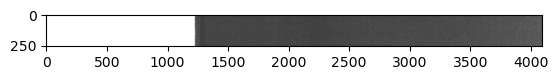

In [4]:
arr = os.listdir(pathNameNoDefect)
good = cv2.imread(pathNameNoDefect+arr[0])
    
plt.imshow(good)
plt.show()


In [7]:
for name in arr:
    img = cv2.imread(pathNameNoDefect + name)
    cropped, canny = cropImage(img)
    
    cv2.imwrite(pathNameNoDefectCropped+name, cropped)
